In [10]:
%autosave 3

Autosaving every 3 seconds


In [42]:
import numpy as np
# a = [
#     [[1,2 ,3 ,4 ],
#       [5,6 ,7 ,8 ],
#       [9,10,11,12]],
    
#      [[13,14,15,16],
#       [17,18,19,20],
#       [21,22,23,24]]
#     ]
# print(np.sum(a,axis=0))
# print(np.sum(a,axis=1))
# print(np.sum(a,axis=2))
# print(np.shape(a))
# print(50*"-")
# print(a)
# a = np.transpose(a,(2,1,0))
a = np.array([1,2,3])
print(np.shape(a))
a = a[:, np.newaxis]
print(np.shape(a))
a = a[np.newaxis, :]
print(a)
print(np.shape(a))

(3,)
(3, 1)
[[[1]
  [2]
  [3]]]
(1, 3, 1)


In [1]:
import tensorflow
import keras
print(tensorflow.__version__,keras.__version__)

Using TensorFlow backend.


1.2.1 2.1.0


In [2]:
dir(keras)

['Input',
 'Model',
 'Sequential',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'absolute_import',
 'activations',
 'applications',
 'backend',
 'callbacks',
 'constraints',
 'datasets',
 'engine',
 'initializers',
 'layers',
 'legacy',
 'losses',
 'metrics',
 'models',
 'optimizers',
 'preprocessing',
 'regularizers',
 'utils',
 'wrappers']

### Keras基础模块
<img src="imgs/keras_model.png">

### SGD
<img src="imgs/sgd.png">

In [25]:
import keras
from keras.models import Sequential #序贯模型
from keras.datasets import mnist #数据集
from keras.layers import Dense #隐藏层
from keras.optimizers import SGD #参数优化

In [26]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() #加载数据集

In [27]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
'''
(60000, 28, 28)：60000张28*28的图片
'''

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


'\n(60000, 28, 28)：60000张28*28的图片\n'

5


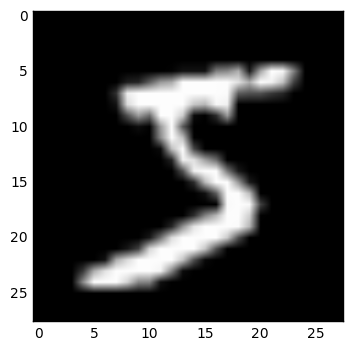

0


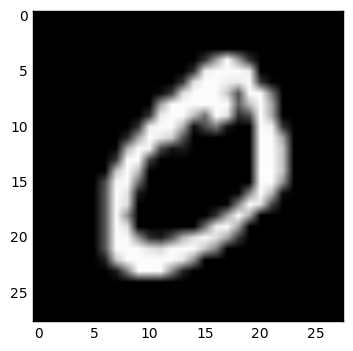

4


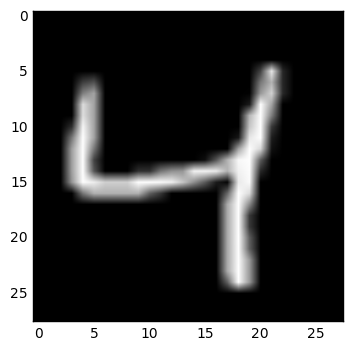

1


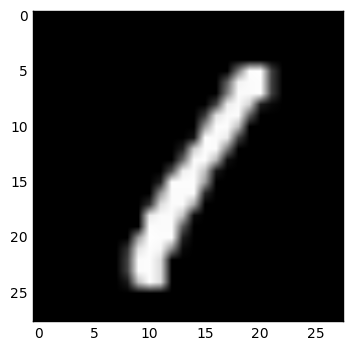

9


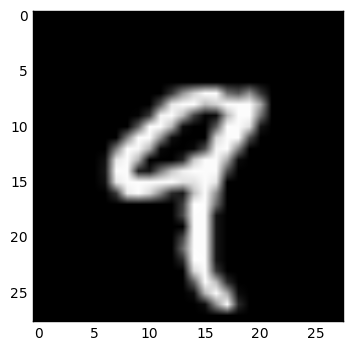

2


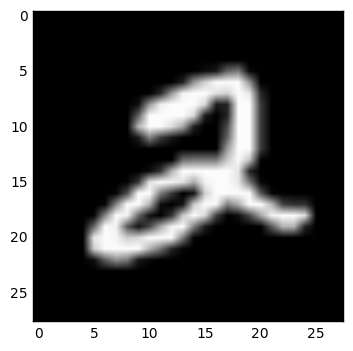

1


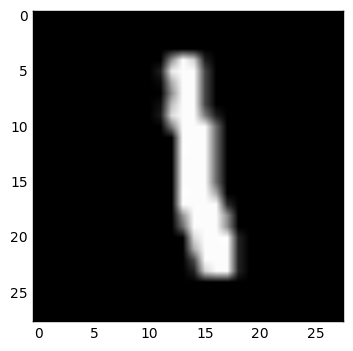

3


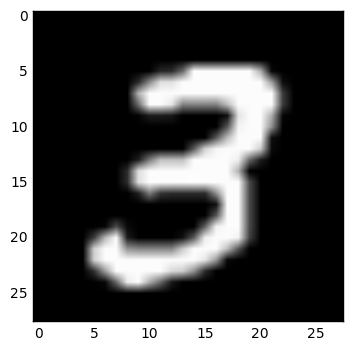

1


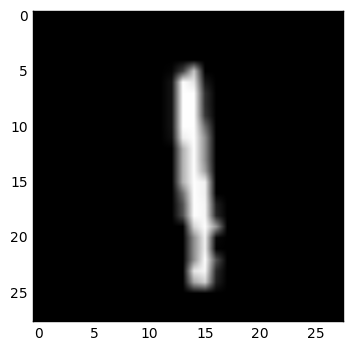

4


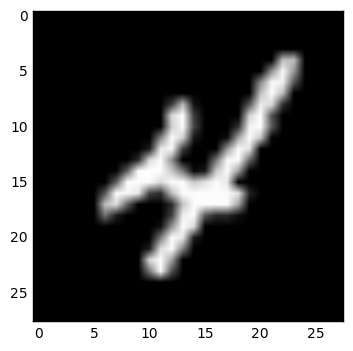

In [33]:
import matplotlib.pyplot as plt
for i in np.arange(10):
    print(y_train[i])
    plt.imshow(x_train[i],cmap="gray") #灰度图
    plt.show()

In [6]:
y_train[0]

5

In [7]:
#将二维图形变成一维向量（摊平）
x_train = x_train.reshape(60000,-1) #28*28=784
x_test = x_test.reshape(10000,-1)

In [31]:
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


In [8]:
#将灰度值正规化为0-1之间的数
x_train = x_train/255
x_test = x_test/255

In [9]:
#输出结果为0-9中的数
y_train = keras.utils.to_categorical(y_train, 10) #转换为独热编码
y_test = keras.utils.to_categorical(y_test, 10)

In [19]:
y_train[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

### 理解Dense(500,input_shape=(784,))
a）Dense层（full connected layer）属于网络层-->常用层中的一个层，等价于Dense(output_dim=500,input_dim=784)

b） 500表示输出的维度，完整的输出表示：(*,500)：即输出任意个500维的数据流。但是在参数中只写维度就可以了，比较具体输出多少个是有输入确定的。换个说法，Dense的输出其实是个N×500的矩阵。

c）input_shape(784,) 表示输入维度是784(28×28)，完整的输入表示：(*,784)：即输入N个784维度的数据

In [10]:
#构建模型
model = Sequential()
model.add(Dense(512,activation="relu",input_dim=784)) #隐层1
model.add(Dense(256,activation="relu")) #隐层2
model.add(Dense(10,activation="softmax")) #输出层

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


<img src="imgs/手写字识别.png">

### 识别过程
<img src="imgs/识别过程.png">

* 人眼几乎只能识别输入层和输出层，而隐层完全无法识别！

In [11]:
#编译模型
model.compile(optimizer=SGD(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
#训练模型
history = model.fit(x_train,y_train,batch_size=64,epochs=10,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 11s 226us/step - loss: 0.8648 - acc: 0.7971 - val_loss: 0.3999 - val_acc: 0.8962
Epoch 2/10
48000/48000 [==============================] - 10s 211us/step - loss: 0.3718 - acc: 0.8987 - val_loss: 0.3100 - val_acc: 0.9130
Epoch 3/10
48000/48000 [==============================] - 11s 226us/step - loss: 0.3098 - acc: 0.9133 - val_loss: 0.2762 - val_acc: 0.9215
Epoch 4/10
48000/48000 [==============================] - 11s 226us/step - loss: 0.2754 - acc: 0.9222 - val_loss: 0.2511 - val_acc: 0.9284
Epoch 5/10
48000/48000 [==============================] - 11s 234us/step - loss: 0.2504 - acc: 0.9284 - val_loss: 0.2327 - val_acc: 0.9330
Epoch 6/10
48000/48000 [==============================] - 11s 230us/step - loss: 0.2303 - acc: 0.9347 - val_loss: 0.2163 - val_acc: 0.9405
Epoch 7/10
48000/48000 [==============================] - 11s 239us/step - loss: 0.2130 - acc: 0.9398 - val_loss: 0.

dict_keys(['val_acc', 'loss', 'acc', 'val_loss'])


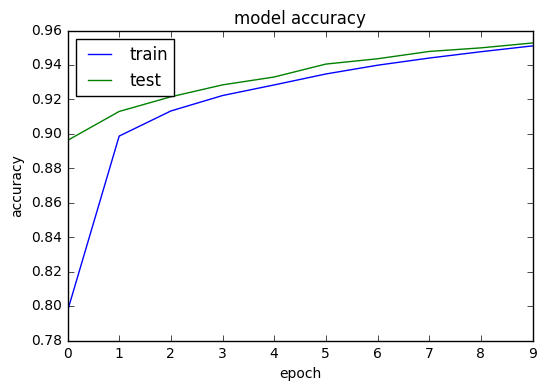

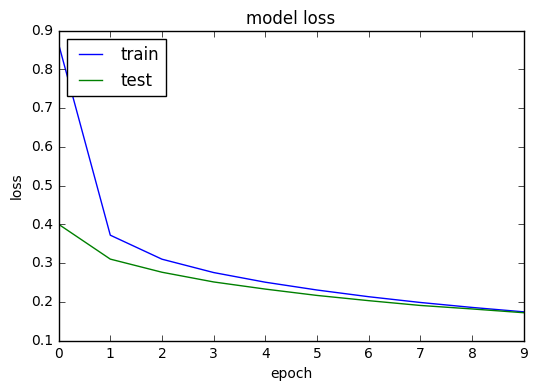

In [13]:
print(history.history.keys()) #列出全部历史数据
#汇总准确率历史数据
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
#汇总损失率历史数据
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [14]:
#测试模型（评估）
score = model.evaluate(x_test,y_test)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

10000/10000 [==============================] - 1s 108us/step
Test Loss: 0.171634368642
Test Accuracy: 0.9498


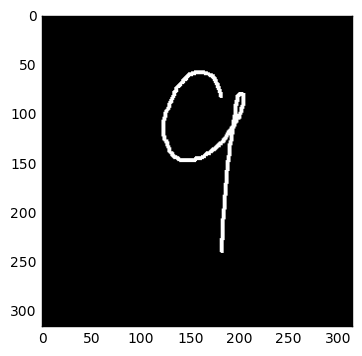

(1, 784)
1/1 [==============================] - 0s 991us/step
[7]


In [24]:
import numpy as np
from skimage.transform import resize
#预测自定义图片
my_img = np.array(plt.imread('input_imgs/9.png'))
plt.imshow(my_img)
plt.show()
my_img = resize(my_img,(28,28,1)) #图片缩放到指定大小28*28
my_img = my_img.reshape(1,-1) #1张28*28*1的图片
print(my_img.shape)
# res = model.predict(my_img)  print(np.argmax(res))
res = model.predict_classes(my_img)
print(res)